# QAOA for Vavriable Selectioon

In [48]:
import sys
sys.path.append('../python')
#same as origin notebook
import pandas as pd
import numpy as np
from typing import List, Tuple
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import winsound
import time

%matplotlib inline

# from pyhon folder in repo
from kqc_custom import qubo_qaoa, qubo_exact, generate_independent_sample, generate_dependent_sample
from qaoa_min import qaoa, partial_r1, partial_r2
from classic_min import classics, qaoa_ind

In [10]:
# Importing standard Qiskit libraries and configuring account
from qiskit_optimization import QuadraticProgram
from qiskit import Aer,IBMQ
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import (
    MinimumEigenOptimizer,
    RecursiveMinimumEigenOptimizer,
    SolutionSample,
    OptimizationResultStatus,
)
from qiskit.visualization import plot_histogram

In [19]:
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second

In [11]:
# Run once for the first time
TOKEN = "3fe453517228f7d730aa0d601175feba50b9e15ad101299a1361277d94a5e3f083c99e1b9d43c27049117b5f42717593b4c9bbd330bf657da722e1ddb35aca4e"
provider = IBMQ.save_account(TOKEN, overwrite = True)

In [12]:
provider = IBMQ.load_account()
provider_real = IBMQ.get_provider(hub='ibm-q-kqc', group='kqc-summer-inter', project='base')

ibmqfactory.load_account:WARNING:2022-08-24 10:23:45,068: Credentials are already in use. The existing account in the session will be replaced.


In [27]:
'''
    choose the Backend 
'''
# Qasm 시뮬레이터/Real_device 사용시
# backend = provider_real.get_backend("ibmq_qasm_simulator")

# 로컬 시뮬레이터 사용시
backend =Aer.get_backend('qasm_simulator')

## Prepare Data

* 우선은 동일하게 세팅
* 지난번과 동일하게 sample 생성을 지정하는 입력기 추가?

## compare the result 

### Input Data 
* n_features : 5
* epsilon : 4
* covariance_parameter : 12

In [26]:
input_param = {'n_samples':500, 'n_features':5, 'beta_coef':[4,3,2,2], 'epsilon':4, 'covariance_parameter':12, 'random_state':None}
X,y = generate_dependent_sample(**input_param)

In [33]:
p = X.shape[1]
mse_list, rsquare_list, aic_list, cn_list = classics(X,y)
result = qaoa(X,y,backend)
aic_qaoa, cn_qaoa, mse_qaoa, rsquare_qaoa = qaoa_ind(X,y,result[0])

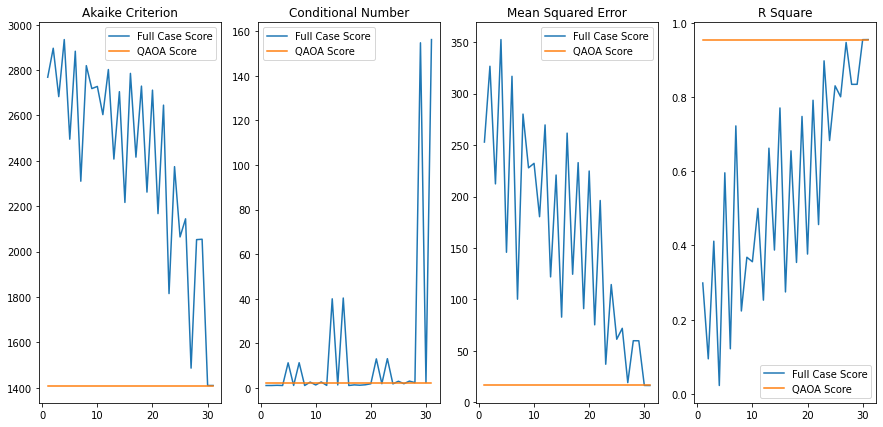

In [35]:
plt.figure(figsize = (15,7))
plt.subplot(141)
plt.plot([i for i in range(1,2**p)],aic_list,label = "Full Case Score")
plt.subplot(142)
plt.plot([i for i in range(1,2**p)],cn_list,label = "Full Case Score")
plt.subplot(143)
plt.plot([i for i in range(1,2**p)],mse_list,label = "Full Case Score")
plt.subplot(144)
plt.plot([i for i in range(1,2**p)],rsquare_list,label = "Full Case Score")

plt.subplot(141)
plt.plot([i for i in range(1,2**p)],[aic_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("Akaike Criterion")
plt.subplot(142)
plt.plot([i for i in range(1,2**p)],[cn_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("Conditional Number")
plt.subplot(143)
plt.plot([i for i in range(1,2**p)],[mse_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("Mean Squared Error")
plt.subplot(144)
plt.plot([i for i in range(1,2**p)],[rsquare_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("R Square")

plt.show()


### Input Data 
* n_features : 10
* epsilon : 4
* covariance_parameter : 2

In [43]:
input_param2 = {'n_samples':500, 'n_features':10, 'beta_coef':[4,3,2,2], 'epsilon':4, 'covariance_parameter':2, 'random_state':None}
X,y = generate_dependent_sample(**input_param2)

In [44]:
p = X.shape[1]
mse_list, rsquare_list, aic_list, cn_list = classics(X,y)
result = qaoa(X,y,backend)
aic_qaoa, cn_qaoa, mse_qaoa, rsquare_qaoa = qaoa_ind(X,y,result[0])

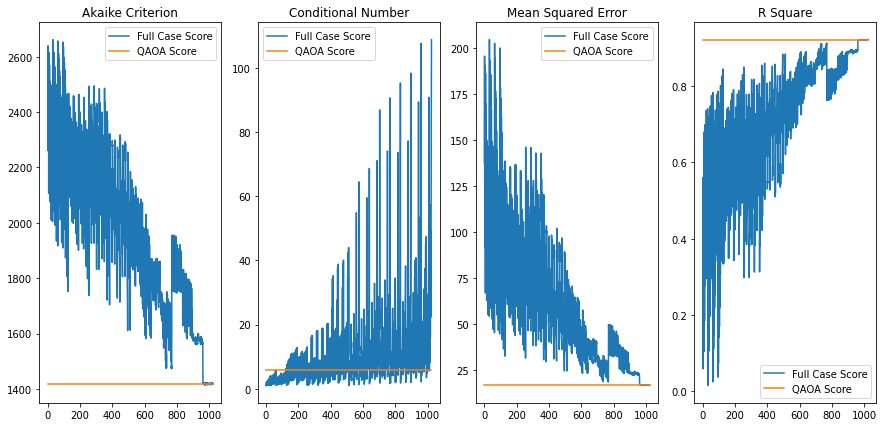

In [45]:
plt.figure(figsize = (15,7))
plt.subplot(141)
plt.plot([i for i in range(1,2**p)],aic_list,label = "Full Case Score")
plt.subplot(142)
plt.plot([i for i in range(1,2**p)],cn_list,label = "Full Case Score")
plt.subplot(143)
plt.plot([i for i in range(1,2**p)],mse_list,label = "Full Case Score")
plt.subplot(144)
plt.plot([i for i in range(1,2**p)],rsquare_list,label = "Full Case Score")

plt.subplot(141)
plt.plot([i for i in range(1,2**p)],[aic_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("Akaike Criterion")
plt.subplot(142)
plt.plot([i for i in range(1,2**p)],[cn_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("Conditional Number")
plt.subplot(143)
plt.plot([i for i in range(1,2**p)],[mse_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("Mean Squared Error")
plt.subplot(144)
plt.plot([i for i in range(1,2**p)],[rsquare_qaoa for i in range(1,2**p)],label = "QAOA Score")
plt.legend()
plt.title("R Square")

plt.show()

In [ ]:
aic_thre = 1440
high_list = np.array([i for i in range(1,2**p)])[np.array(aic_list)<aic_thre]
high_index = pd.DataFrame([[int(k) for k in bin(j)[2:]] for j in high_list])
# high_index.apply(sum,axis=0)

In [49]:
rsquare_compare = pd.DataFrame([partial_r1(X,y),partial_r2(X,y)])
rsquare_compare.columns = ["x" + str(i+1) for i in range(X.shape[1])]
rsquare_compare.index = ["Partial R^2","Simple R^2"]
rsquare_compare = rsquare_compare

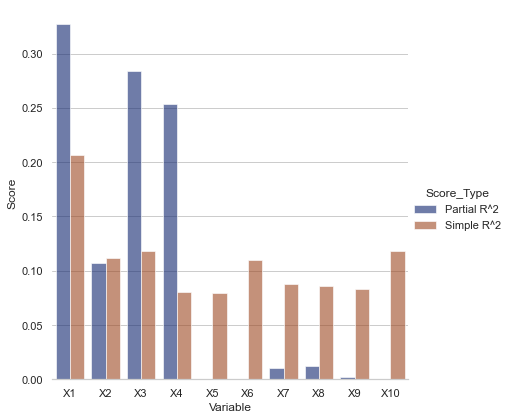

In [50]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plotdf = partial_r1(X,y)
plotdf = pd.DataFrame(np.append(plotdf,partial_r2(X,y)))
plotdf.columns = ["Score"]
plotdf["Variable"] = ["X" + str(i+1) for i in range(p)] + ["X" + str(i+1) for i in range(p)]
plotdf["Score_Type"] =["Partial R^2" for i in range(p)]+["Simple R^2" for i in range(p)]


g = sns.catplot(
    data=plotdf, kind="bar",
    x="Variable", y="Score", hue="Score_Type", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
plt.show()